# Credit Card Fraud Modeling- Capital One Data Science Challenge

## A. Exploratory Data Analysis

-----

### 1. Upload the dataset

#### Imports

In [9]:
import os

import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
input_file = '/Users/DS/Capital_One_Data_Science_Challenge/transactions.txt'

Convert the dataset from json to csv. Create a dataframe to do intial data exploration on the dataset

In [11]:
def import_data(input_file):
    # Check if file exists
    if not os.path.exists(input_file):
        raise FileNotFoundError(f"The file '{input_file}' does not exist.")
    
    dfList = []
    try:
        # Read JSON file in chunks
        for iot_chunk in pd.read_json(input_file, lines=True, chunksize=100000):
            dfList.append(iot_chunk)
        df = pd.concat(dfList, sort=False)
    except ValueError as e:
        raise ValueError(f"Error reading JSON file: {e}. Ensure the file is in JSON Lines format.")
    except Exception as e:
        raise Exception(f"An unexpected error occurred: {e}")
    
    return df

In [12]:
try:
    transactions = import_data(input_file)
    display(transactions.head(3))
except Exception as e:
    print(f"Error: {e}")

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False


In [13]:
# Insert Nan into the dataset
transactions.replace(["None", "NULL", "NA", ""], np.nan, inplace=True)

/var/folders/4g/grss87b92zg4hmdb08ct09b00000gn/T/ipykernel_44188/1887572389.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transactions.replace(["None", "NULL", "NA", ""], np.nan, inplace=True)


In [14]:
# Export DataFrame to CSV
csv_file = '/Users/DS/Capital_One_Data_Science_Challenge/output.csv'
transactions.to_csv(csv_file, index=False)

print(f"DataFrame exported to {csv_file}")

DataFrame exported to /Users/DS/Capitol_One_Data_Science_Challenge/output.csv


------

### 2.  Explore the Dataset

In [15]:
# Get the first 5 rows of the dataset
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [16]:
# Gather information on the dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [17]:
# Descriptive statistics of the features in the dataset
transactions.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [18]:
# Drop duplicates from the dataset
transactions = transactions.drop_duplicates(keep='last')
transactions

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [19]:
# Count the number of null values in each column
transactions.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [20]:
# Identify the columns where all the data is null
full_null_columns = transactions.columns[transactions.isnull().all() == True]
print(full_null_columns)

Index(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',
       'posOnPremises', 'recurringAuthInd'],
      dtype='object')


The columns 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' are all null values.

In [21]:
# Drop columns that only contain null values
transactions = transactions.drop(columns=full_null_columns)
transactions.columns


Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [22]:
# Display the new transactions dataset
display(transactions)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [23]:
# Convert the transaction dates into proper date time
transactions['transactionDateTime'] = pd.to_datetime(transactions['transactionDateTime'])
transactions.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [24]:
# Identify how many unique customers are in this dataset
transactions['customerId'].nunique()

5000

There are 5000 unique customers.

In [25]:
# Identify how many unique merchants in this dataset
transactions['merchantName'].nunique()

2490

There are 2490 unique merchants.

In [26]:
# Identify the frequency of purchases directed to the top 10 merchants
top_merchants = transactions['merchantName'].value_counts().head(10)
print(top_merchants)

merchantName
Uber             25613
Lyft             25523
oldnavy.com      16992
staples.com      16980
alibaba.com      16959
apple.com        16898
walmart.com      16873
cheapfast.com    16858
ebay.com         16842
target.com       16813
Name: count, dtype: int64


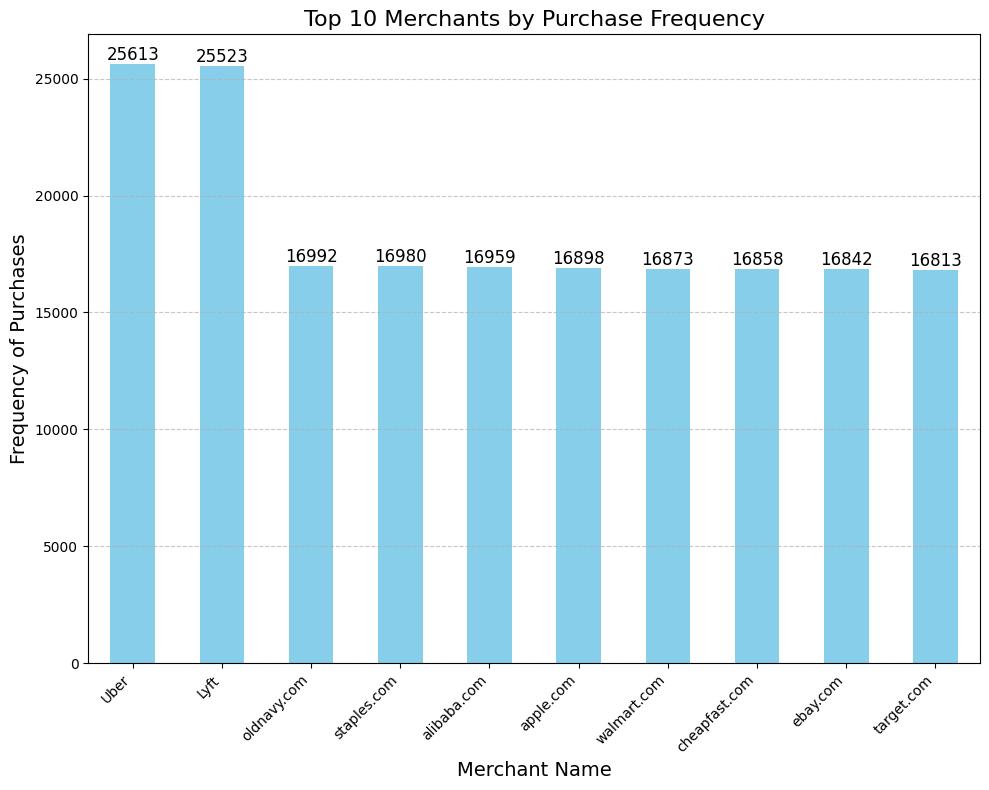

In [27]:
# Create a bar plot for 'Top 10 Merchants by Purchase Frequency'
plt.figure(figsize=(10, 8))
bars = top_merchants.plot(kind='bar', color='skyblue')

# Add the values on top of each bar
for index, value in enumerate(top_merchants.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Set chart details
plt.title('Top 10 Merchants by Purchase Frequency', fontsize=16)
plt.xlabel('Merchant Name', fontsize=14)
plt.ylabel('Frequency of Purchases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# Merchants' country of location
unique_countries = transactions['merchantCountryCode'].value_counts()
print(unique_countries)

merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64


Merchants are from 4 countries: United States, Mexico, Canada, and Puerto Rico.

In [29]:
# Identify categories of purchase
transaction_categories = transactions['merchantCategoryCode'].value_counts()
print(transaction_categories)

merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64


In [30]:
# Convert the Series to a DataFrame for easier plotting
transaction_categories_df = transaction_categories.reset_index()
transaction_categories_df.columns = ['MerchantCategory', 'Frequency']

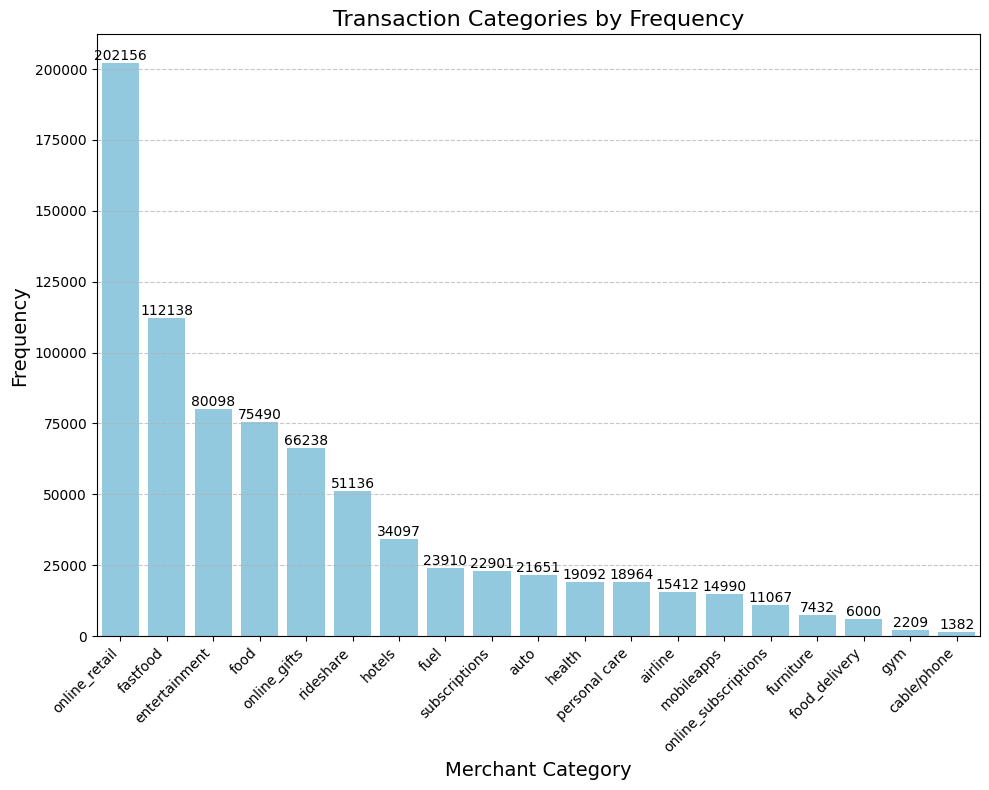

In [31]:
# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=transaction_categories_df, x='MerchantCategory', y='Frequency', color='skyblue')

# Add values on top of the bars
for index, value in enumerate(transaction_categories_df['Frequency']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Set plot details
plt.title('Transaction Categories by Frequency', fontsize=16)
plt.xlabel('Merchant Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
# Number of purchases that were made in-person or online
transactions.cardPresent.value_counts()

cardPresent
False    433495
True     352868
Name: count, dtype: int64

In [33]:
round(transactions.cardPresent.value_counts()[0]/len(transactions), 4)

/var/folders/4g/grss87b92zg4hmdb08ct09b00000gn/T/ipykernel_44188/3645497492.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round(transactions.cardPresent.value_counts()[0]/len(transactions), 4)


0.5513

Online transactions account for 55% of all purchases.

In [34]:
# Check for different kinds of credit limits
transactions.creditLimit.unique()

array([ 5000,  2500, 50000, 15000, 10000,   250,   500,  1000,  7500,
       20000])

Capital One offers cards with credit limits of $5000, $2500, $50000, $15000, $10000, $250, $500, $1000, $7500, $20000.

In [35]:
# Identify how many transactions are fraudulent
transactions['isFraud'].value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

There are 12417 fraudulent cases.

In [36]:
# Check the ratio of fraud cases with real purchases
round(transactions['isFraud'].value_counts()[1] / len(transactions), 4)

/var/folders/4g/grss87b92zg4hmdb08ct09b00000gn/T/ipykernel_44188/4197652437.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round(transactions['isFraud'].value_counts()[1] / len(transactions), 4)


0.0158

Fraudulent purchases only account about 1.58% of all purchases in the dataset.

In [37]:
# Identify the different kinds of purchase types
transactions['transactionType'].value_counts()

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64

There are three transaction types in the dataset: 'Purchase', 'Reversal', and 'Address Verification.'

In [38]:
# Check the descriptive statistics of the transactions in the dataset

transactions.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

The average transaction amounts to $137, the maximum transaction is $2011.50. The standard deviation from average transactions is about $147.73

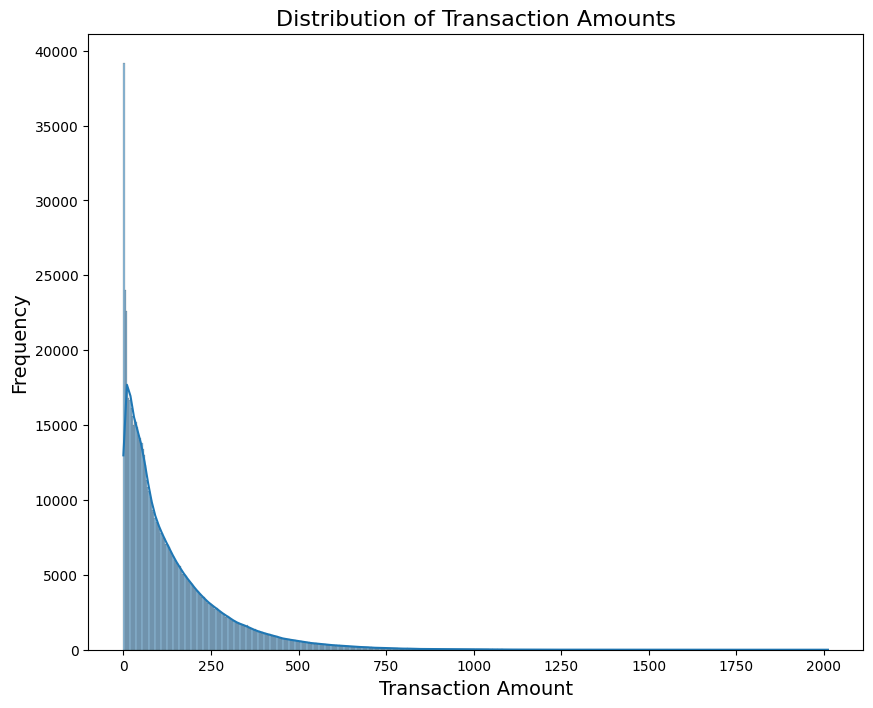

In [39]:
# Plot the distribution of transactions
plt.figure(figsize=(10, 8))
sns.histplot(transactions['transactionAmount'], kde=True)

plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

The transactions are right-skewed. 